# 10 minutes to pandas

In [1]:
import numpy as np

In [2]:
import pandas as pd

# Object creation

Creating a **Series** by passing a list of values, letting pandas create a default integer index:

In [3]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])

In [4]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a **DataFrame** by passing a NumPy array, with a datetime index and labeled columns:

In [5]:
dates = pd.date_range("20130101", periods=6)

In [6]:
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [8]:
df

,A,B,C,D
2013-01-01,1.435624,0.440426,-0.266832,0.309353
2013-01-02,-0.070985,0.094138,0.119835,-0.437965
2013-01-03,1.430869,0.646556,1.186369,-1.285795
2013-01-04,-0.156869,0.335136,-0.278325,-1.144843
2013-01-05,0.676672,0.329741,0.432992,0.484616
2013-01-06,-0.649631,0.413285,-2.568773,0.255354


Creating a **DataFrame** by passing a dictionary of objects that can be converted into a series-like structure:

In [9]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)

In [10]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting **DataFrame** have different **dtypes**:

In [11]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [ ]:
df2.<TAB>  # noqa: E225, E999

# Viewing data

See the **Basics section**.

Here is how to view the top and bottom rows of the frame:

In [12]:
df.head()

,A,B,C,D
2013-01-01,1.435624,0.440426,-0.266832,0.309353
2013-01-02,-0.070985,0.094138,0.119835,-0.437965
2013-01-03,1.430869,0.646556,1.186369,-1.285795
2013-01-04,-0.156869,0.335136,-0.278325,-1.144843
2013-01-05,0.676672,0.329741,0.432992,0.484616


In [13]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.156869,0.335136,-0.278325,-1.144843
2013-01-05,0.676672,0.329741,0.432992,0.484616
2013-01-06,-0.649631,0.413285,-2.568773,0.255354


Display the index, columns:

In [14]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

For **df**, our **DataFrame** of all floating-point values, **DataFrame.to_numpy()** is fast and doesn’t require copying data:

In [16]:
df.to_numpy()

array([[ 1.43562388,  0.44042631, -0.2668317 ,  0.30935305],
       [-0.07098496,  0.0941378 ,  0.11983456, -0.43796451],
       [ 1.4308693 ,  0.64655614,  1.18636866, -1.28579462],
       [-0.15686927,  0.33513598, -0.27832548, -1.14484332],
       [ 0.67667195,  0.32974074,  0.43299234,  0.48461574],
       [-0.64963114,  0.41328541, -2.56877282,  0.25535401]])

For **df2**, the **DataFrame** with multiple dtypes, **DataFrame.to_numpy()** is relatively expensive:

In [17]:
df2.to_numpy()

array([[1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'test', 'foo'],
       [1.0, Timestamp('2013-01-02 00:00:00'), 1.0, 3, 'train', 'foo']],
      dtype=object)

**describe()** shows a quick statistic summary of your data:

In [18]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.444280,0.376547,-0.229122,-0.303213
std,0.875631,0.179998,1.268195,0.774580
min,-0.649631,0.094138,-2.568773,-1.285795
25%,-0.135398,0.331090,-0.275452,-0.968124
50%,0.302843,0.374211,-0.073499,-0.091305
75%,1.242320,0.433641,0.354703,0.295853
max,1.435624,0.646556,1.186369,0.484616


In [19]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,1.435624,-0.070985,1.430869,-0.156869,0.676672,-0.649631
B,0.440426,0.094138,0.646556,0.335136,0.329741,0.413285
C,-0.266832,0.119835,1.186369,-0.278325,0.432992,-2.568773
D,0.309353,-0.437965,-1.285795,-1.144843,0.484616,0.255354


In [20]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.309353,-0.266832,0.440426,1.435624
2013-01-02,-0.437965,0.119835,0.094138,-0.070985
2013-01-03,-1.285795,1.186369,0.646556,1.430869
2013-01-04,-1.144843,-0.278325,0.335136,-0.156869
2013-01-05,0.484616,0.432992,0.329741,0.676672
2013-01-06,0.255354,-2.568773,0.413285,-0.649631


In [21]:
df.sort_values(by="B")

,A,B,C,D
2013-01-02,-0.070985,0.094138,0.119835,-0.437965
2013-01-05,0.676672,0.329741,0.432992,0.484616
2013-01-04,-0.156869,0.335136,-0.278325,-1.144843
2013-01-06,-0.649631,0.413285,-2.568773,0.255354
2013-01-01,1.435624,0.440426,-0.266832,0.309353
2013-01-03,1.430869,0.646556,1.186369,-1.285795


# Selection

# Getting

In [22]:
df["A"]

2013-01-01    1.435624
2013-01-02   -0.070985
2013-01-03    1.430869
2013-01-04   -0.156869
2013-01-05    0.676672
2013-01-06   -0.649631
Freq: D, Name: A, dtype: float64

In [23]:
df[0:3]

,A,B,C,D
2013-01-01,1.435624,0.440426,-0.266832,0.309353
2013-01-02,-0.070985,0.094138,0.119835,-0.437965
2013-01-03,1.430869,0.646556,1.186369,-1.285795


In [24]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.070985,0.094138,0.119835,-0.437965
2013-01-03,1.430869,0.646556,1.186369,-1.285795
2013-01-04,-0.156869,0.335136,-0.278325,-1.144843


# Selection by label

In [25]:
df.loc[dates[0]]

A    1.435624
B    0.440426
C   -0.266832
D    0.309353
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,1.435624,0.440426
2013-01-02,-0.070985,0.094138
2013-01-03,1.430869,0.646556
2013-01-04,-0.156869,0.335136
2013-01-05,0.676672,0.329741
2013-01-06,-0.649631,0.413285


In [27]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.070985,0.094138
2013-01-03,1.430869,0.646556
2013-01-04,-0.156869,0.335136


In [28]:
df.loc["20130102", ["A", "B"]]

A   -0.070985
B    0.094138
Name: 2013-01-02 00:00:00, dtype: float64

In [29]:
df.loc[dates[0], "A"]

1.4356238799096277

In [30]:
df.at[dates[0], "A"]

1.4356238799096277

# Selection by position

In [31]:
df.iloc[3]

A   -0.156869
B    0.335136
C   -0.278325
D   -1.144843
Name: 2013-01-04 00:00:00, dtype: float64

In [32]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.156869,0.335136
2013-01-05,0.676672,0.329741


In [33]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.070985,0.119835
2013-01-03,1.430869,1.186369
2013-01-05,0.676672,0.432992


In [34]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.070985,0.094138,0.119835,-0.437965
2013-01-03,1.430869,0.646556,1.186369,-1.285795


In [35]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.440426,-0.266832
2013-01-02,0.094138,0.119835
2013-01-03,0.646556,1.186369
2013-01-04,0.335136,-0.278325
2013-01-05,0.329741,0.432992
2013-01-06,0.413285,-2.568773


In [36]:
df.iloc[1, 1]

0.09413779586360561

In [37]:
df.iat[1, 1]

0.09413779586360561

# Boolean indexing

In [38]:
df[df["A"] > 0]

,A,B,C,D
2013-01-01,1.435624,0.440426,-0.266832,0.309353
2013-01-03,1.430869,0.646556,1.186369,-1.285795
2013-01-05,0.676672,0.329741,0.432992,0.484616


In [39]:
df[df > 0]

,A,B,C,D
2013-01-01,1.435624,0.440426,NaN,0.309353
2013-01-02,NaN,0.094138,0.119835,NaN
2013-01-03,1.430869,0.646556,1.186369,NaN
2013-01-04,NaN,0.335136,NaN,NaN
2013-01-05,0.676672,0.329741,0.432992,0.484616
2013-01-06,NaN,0.413285,NaN,0.255354


In [40]:
df2 = df.copy()

In [41]:
df2["E"] = ["one", "one", "two", "three", "four", "three"]

In [42]:
df2

,A,B,C,D,E
2013-01-01,1.435624,0.440426,-0.266832,0.309353,one
2013-01-02,-0.070985,0.094138,0.119835,-0.437965,one
2013-01-03,1.430869,0.646556,1.186369,-1.285795,two
2013-01-04,-0.156869,0.335136,-0.278325,-1.144843,three
2013-01-05,0.676672,0.329741,0.432992,0.484616,four
2013-01-06,-0.649631,0.413285,-2.568773,0.255354,three


In [43]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,1.430869,0.646556,1.186369,-1.285795,two
2013-01-05,0.676672,0.329741,0.432992,0.484616,four


# Setting

In [44]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))

In [45]:
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [46]:
df["F"] = s1

In [47]:
df.at[dates[0], "A"] = 0

In [48]:
df.iat[0, 1] = 0

In [49]:
df.loc[:, "D"] = np.array([5] * len(df))

In [50]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.266832,5,NaN
2013-01-02,-0.070985,0.094138,0.119835,5,1.0
2013-01-03,1.430869,0.646556,1.186369,5,2.0
2013-01-04,-0.156869,0.335136,-0.278325,5,3.0
2013-01-05,0.676672,0.329741,0.432992,5,4.0
2013-01-06,-0.649631,0.413285,-2.568773,5,5.0


In [51]:
df2 = df.copy()

In [52]:
df[df2 > 0] = -df2

In [53]:
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.266832,5,NaN
2013-01-02,-0.070985,0.094138,0.119835,5,1.0
2013-01-03,1.430869,0.646556,1.186369,5,2.0
2013-01-04,-0.156869,0.335136,-0.278325,5,3.0
2013-01-05,0.676672,0.329741,0.432992,5,4.0
2013-01-06,-0.649631,0.413285,-2.568773,5,5.0


# Missing data

In [54]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])

In [55]:
df1.loc[dates[0] : dates[1], "E"] = 1

In [56]:
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.266832,-5,NaN,1.0
2013-01-02,-0.070985,-0.094138,-0.119835,-5,-1.0,1.0
2013-01-03,-1.430869,-0.646556,-1.186369,-5,-2.0,NaN
2013-01-04,-0.156869,-0.335136,-0.278325,-5,-3.0,NaN


In [57]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.070985,-0.094138,-0.119835,-5,-1.0,1.0


In [58]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.266832,-5,5.0,1.0
2013-01-02,-0.070985,-0.094138,-0.119835,-5,-1.0,1.0
2013-01-03,-1.430869,-0.646556,-1.186369,-5,-2.0,5.0
2013-01-04,-0.156869,-0.335136,-0.278325,-5,-3.0,5.0


In [59]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# Operations

# Stats

In [60]:
df.mean()

A   -0.497504
B   -0.303143
C   -0.808854
D   -5.000000
F   -3.000000
dtype: float64

In [61]:
df.mean(1)

2013-01-01   -1.316708
2013-01-02   -1.256991
2013-01-03   -2.052759
2013-01-04   -1.754066
2013-01-05   -2.087881
2013-01-06   -2.726338
Freq: D, dtype: float64

In [62]:
s = pd.Series([1, 3, 5, np.nan, 6, 8,], index=dates).shift(2)

In [63]:
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [64]:
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-2.430869,-1.646556,-2.186369,-6.0,-3.0
2013-01-04,-3.156869,-3.335136,-3.278325,-8.0,-6.0
2013-01-05,-5.676672,-5.329741,-5.432992,-10.0,-9.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


# Apply

In [65]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.266832,-5,NaN
2013-01-02,-0.070985,-0.094138,-0.386666,-10,-1.0
2013-01-03,-1.501854,-0.740694,-1.573035,-15,-3.0
2013-01-04,-1.658724,-1.075830,-1.851360,-20,-6.0
2013-01-05,-2.335395,-1.405571,-2.284353,-25,-10.0
2013-01-06,-2.985027,-1.818856,-4.853126,-30,-15.0


In [66]:
df.apply(lambda x: x.max() - x.min())

A    1.430869
B    0.646556
C    2.448938
D    0.000000
F    4.000000
dtype: float64

# Histogramming

In [67]:
s = pd.Series(np.random.randint(0, 7, size=10))

In [68]:
s

0    1
1    4
2    3
3    3
4    2
5    2
6    4
7    2
8    6
9    1
dtype: int32

In [69]:
s.value_counts()

2    3
1    2
4    2
3    2
6    1
dtype: int64

# String Methods

In [70]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])

In [71]:
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# Merge

# Concat

In [72]:
df = pd.DataFrame(np.random.randn(10, 4))

In [73]:
df

,0,1,2,3
0,-0.776029,2.055723,-0.072486,0.952524
1,-0.434896,0.304420,1.272638,1.294594
2,-0.974954,0.517402,-2.695420,0.022633
3,0.389334,-0.875101,0.792237,-0.533786
4,-0.175781,0.487559,0.145870,-0.935145
5,-0.682947,0.872342,-1.024590,-1.563886
6,0.057990,1.166490,-0.413791,0.179117
7,0.699911,-0.272554,0.081257,-0.424275
8,-0.289170,0.260990,-1.006537,0.250836
9,-0.818328,-2.866994,-0.678340,-0.741287


In [74]:
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

In [75]:
pd.concat(pieces)

,0,1,2,3
0,-0.776029,2.055723,-0.072486,0.952524
1,-0.434896,0.304420,1.272638,1.294594
2,-0.974954,0.517402,-2.695420,0.022633
3,0.389334,-0.875101,0.792237,-0.533786
4,-0.175781,0.487559,0.145870,-0.935145
5,-0.682947,0.872342,-1.024590,-1.563886
6,0.057990,1.166490,-0.413791,0.179117
7,0.699911,-0.272554,0.081257,-0.424275
8,-0.289170,0.260990,-1.006537,0.250836
9,-0.818328,-2.866994,-0.678340,-0.741287


# Join

In [76]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})

In [77]:
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [78]:
left

,key,lval
0,foo,1
1,foo,2


In [79]:
right

,key,rval
0,foo,4
1,foo,5


In [80]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


In [81]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})

In [82]:
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [83]:
left

,key,lval
0,foo,1
1,bar,2


In [84]:
right

,key,rval
0,foo,4
1,bar,5


In [85]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


# Grouping

In [86]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)

In [87]:
df

,A,B,C,D
0,foo,one,1.987438,-1.047444
1,bar,one,0.137722,-0.497420
2,foo,two,0.104810,-0.878575
3,bar,three,-0.502146,-0.459507
4,foo,two,0.486865,-2.699150
5,bar,two,-0.159462,0.171117
6,foo,one,-1.551305,-0.017089
7,foo,three,-0.427668,-1.971377


In [88]:
df.groupby("A").sum()

,C,D
A,,
bar,-0.523886,-0.785810
foo,0.600140,-6.613635


In [89]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    0.137722 -0.497420
    three -0.502146 -0.459507
    two   -0.159462  0.171117
foo one    0.436133 -1.064533
    three -0.427668 -1.971377
    two    0.591675 -3.577725

# Reshaping

# Stack

In [90]:
tuples = list(
    zip(
        *[
            ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
            ["one", "two", "one", "two", "one", "two", "one", "two"],
        ]
    )
)

In [91]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])

In [92]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

In [93]:
df2 = df[:4]

In [94]:
df2

A         B
first second                    
bar   one     1.871832  0.340148
      two     1.532838  0.132328
baz   one     0.647861 -1.856508
      two    -0.318151  0.081479

In [95]:
stacked = df2.stack()

In [96]:
stacked

first  second   
bar    one     A    1.871832
               B    0.340148
       two     A    1.532838
               B    0.132328
baz    one     A    0.647861
               B   -1.856508
       two     A   -0.318151
               B    0.081479
dtype: float64

In [97]:
stacked.unstack()

A         B
first second                    
bar   one     1.871832  0.340148
      two     1.532838  0.132328
baz   one     0.647861 -1.856508
      two    -0.318151  0.081479

In [98]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.871832  1.532838
      B  0.340148  0.132328
baz   A  0.647861 -0.318151
      B -1.856508  0.081479

In [99]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.871832  0.647861
       B  0.340148 -1.856508
two    A  1.532838 -0.318151
       B  0.132328  0.081479

# Pivot tables

In [100]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

In [101]:
df

,A,B,C,D,E
0,one,A,foo,-0.643334,-0.068659
1,one,B,foo,0.238173,0.348314
2,two,C,foo,-1.712697,0.295037
3,three,A,bar,-1.209936,0.623558
4,one,B,bar,-0.143943,-0.722232
5,one,C,bar,0.240591,1.742628
6,two,A,foo,1.667717,1.133141
7,three,B,foo,0.338777,-1.347715
8,one,C,foo,0.283990,2.508750
9,one,A,bar,0.998801,0.551221


In [102]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A  0.998801 -0.643334
      B -0.143943  0.238173
      C  0.240591  0.283990
three A -1.209936       NaN
      B       NaN  0.338777
      C -2.121671       NaN
two   A       NaN  1.667717
      B -1.419378       NaN
      C       NaN -1.712697

# Time series

In [103]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")

In [104]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [105]:
ts.resample("5Min").sum()

2012-01-01    26194
Freq: 5T, dtype: int32

In [106]:
# Time zone representation
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

In [107]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [108]:
ts

2012-03-06    0.390889
2012-03-07    0.112814
2012-03-08    0.390391
2012-03-09   -0.010696
2012-03-10    1.482460
Freq: D, dtype: float64

In [109]:
ts_utc = ts.tz_localize("UTC")

In [110]:
ts_utc

2012-03-06 00:00:00+00:00    0.390889
2012-03-07 00:00:00+00:00    0.112814
2012-03-08 00:00:00+00:00    0.390391
2012-03-09 00:00:00+00:00   -0.010696
2012-03-10 00:00:00+00:00    1.482460
Freq: D, dtype: float64

In [111]:
ts_utc.tz_convert("US/Eastern")

2012-03-05 19:00:00-05:00    0.390889
2012-03-06 19:00:00-05:00    0.112814
2012-03-07 19:00:00-05:00    0.390391
2012-03-08 19:00:00-05:00   -0.010696
2012-03-09 19:00:00-05:00    1.482460
Freq: D, dtype: float64

In [112]:
# Converting between time span representations
rng = pd.date_range("1/1/2012", periods=5, freq="M")

In [113]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)

In [114]:
ts

2012-01-31   -0.014195
2012-02-29   -0.727957
2012-03-31   -0.207097
2012-04-30   -1.258693
2012-05-31    0.903627
Freq: M, dtype: float64

In [115]:
ps = ts.to_period()

In [116]:
ps

2012-01   -0.014195
2012-02   -0.727957
2012-03   -0.207097
2012-04   -1.258693
2012-05    0.903627
Freq: M, dtype: float64

In [117]:
ps.to_timestamp()

2012-01-01   -0.014195
2012-02-01   -0.727957
2012-03-01   -0.207097
2012-04-01   -1.258693
2012-05-01    0.903627
Freq: MS, dtype: float64

In [118]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")

In [119]:
ts = pd.Series(np.random.randn(len(prng)), prng)

In [120]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9

In [121]:
ts.head()

1990-03-01 09:00    0.398928
1990-06-01 09:00   -0.656722
1990-09-01 09:00   -2.259212
1990-12-01 09:00   -0.701131
1991-03-01 09:00    0.893584
Freq: H, dtype: float64

# Categoricals

In [122]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

In [123]:
df["grade"] = df["raw_grade"].astype("category")

In [124]:
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [125]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

In [126]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

In [127]:
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [128]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


In [129]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

# Plotting

In [130]:
import matplotlib.pyplot as plt

In [131]:
plt.close("all")

In [132]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [133]:
ts = ts.cumsum()

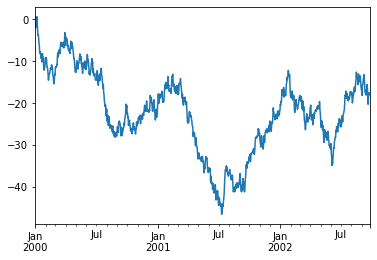

In [134]:
ts.plot();

In [135]:
plt.show();

In [136]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

In [137]:
df = df.cumsum()

In [138]:
plt.figure();

<Figure size 432x288 with 0 Axes>

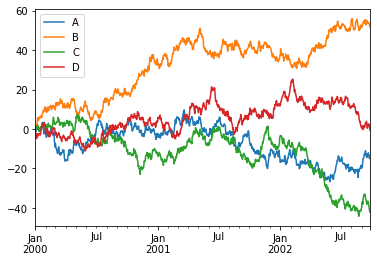

In [139]:
df.plot();

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


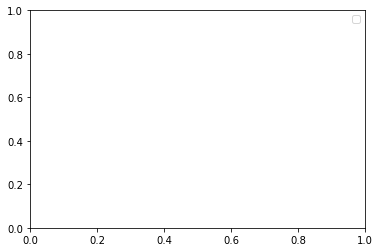

In [140]:
plt.legend(loc='best');

# Getting data in / out

# CSV

In [141]:
df.to_csv("foo.csv")

In [142]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.785426,1.313554,-0.059172,-0.435472
1,2000-01-02,-1.431609,0.889035,-0.462463,-2.147313
2,2000-01-03,-0.964999,0.850874,0.122573,-2.648379
3,2000-01-04,0.659967,0.912216,0.289709,-4.107332
4,2000-01-05,1.075205,2.241273,0.940024,-4.850291
...,...,...,...,...,...
995,2002-09-22,-13.453611,53.794213,-39.008462,1.709775
996,2002-09-23,-13.832812,53.503873,-39.845279,2.299674
997,2002-09-24,-14.995114,52.498001,-40.842457,1.332658
998,2002-09-25,-13.781525,52.102317,-42.077994,-0.148699


# HDF5

In [143]:
df.to_hdf("foo.h5", "df")

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [144]:
pd.read_hdf("foo.h5", "df")

FileNotFoundError: File foo.h5 does not exist

# Excel

In [145]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

In [146]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.785426,1.313554,-0.059172,-0.435472
1,2000-01-02,-1.431609,0.889035,-0.462463,-2.147313
2,2000-01-03,-0.964999,0.850874,0.122573,-2.648379
3,2000-01-04,0.659967,0.912216,0.289709,-4.107332
4,2000-01-05,1.075205,2.241273,0.940024,-4.850291
...,...,...,...,...,...
995,2002-09-22,-13.453611,53.794213,-39.008462,1.709775
996,2002-09-23,-13.832812,53.503873,-39.845279,2.299674
997,2002-09-24,-14.995114,52.498001,-40.842457,1.332658
998,2002-09-25,-13.781525,52.102317,-42.077994,-0.148699


# Gotchas

In [147]:
if pd.Series([False, True, False]):
    print("I was True")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().